Case 1: Graph of loss, accuracy, em trend with large, medium, and small data.

CAP Treesitter

Plot saved to /home/user1-system11/Documents/research-shradha/CODE-SPT-Code/Graph/case10-org-loss-fixed.png
Plot saved to /home/user1-system11/Documents/research-shradha/CODE-SPT-Code/Graph/case12-org-bleu-fixed.png


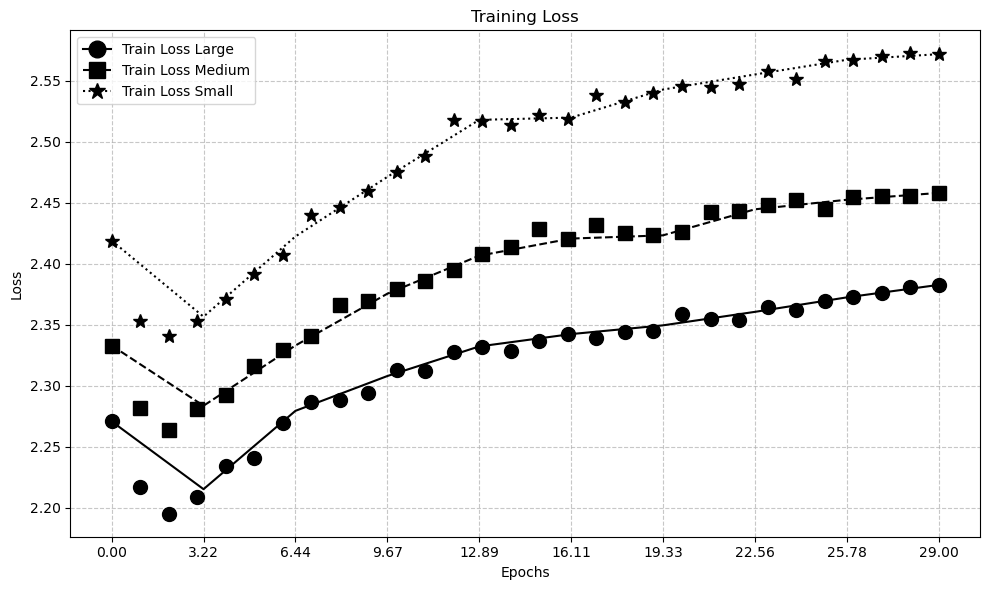

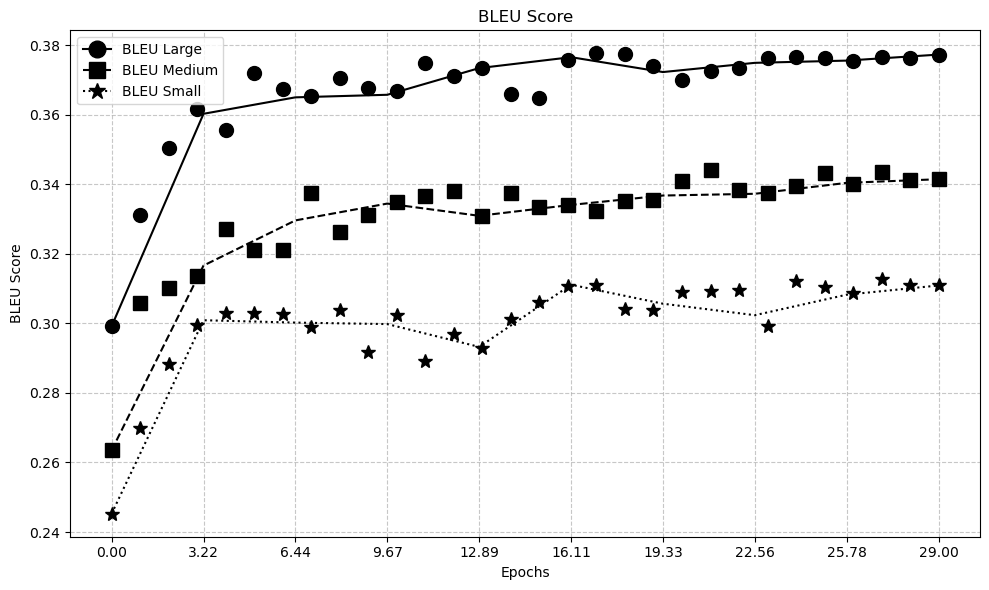

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
import matplotlib.lines as mlines

# File paths (update as necessary)
small_csv_file = "/home/user1-system11/Documents/research-shradha/CODE-SPT-Code-TreeSitterV3/SPT-Code/outputs/pre_train_20241114_173013/small_evaluation_metrics.csv"
mid_csv_file = "/home/user1-system11/Documents/research-shradha/CODE-SPT-Code-TreeSitterV3/SPT-Code/outputs/pre_train_20241116_103947/mid_evaluation_metrics.csv"
large_csv_file = "/home/user1-system11/Documents/research-shradha/CODE-SPT-Code-TreeSitterV3/SPT-Code/outputs/pre_train_20241105_105459/large_evaluation_metrics.csv"

# Load data from CSV files with error handling
try:
    small_data = pd.read_csv(small_csv_file)
    mid_data = pd.read_csv(mid_csv_file)
    large_data = pd.read_csv(large_csv_file)
except FileNotFoundError as e:
    print(f"Error loading file: {e}")
    exit(1)

# Extract columns with error handling
def extract_column(data, column_name):
    try:
        return data[column_name].tolist()
    except KeyError:
        print(f"Column '{column_name}' not found in data")
        return []

epochs = extract_column(small_data, "epoch")
train_loss_large = extract_column(large_data, "eval_loss")
train_loss_medium = extract_column(mid_data, "eval_loss")
train_loss_small = extract_column(small_data, "eval_loss")

bleu_large = extract_column(large_data, "eval_bleu")
bleu_medium = extract_column(mid_data, "eval_bleu")
bleu_small = extract_column(small_data, "eval_bleu")

def smooth_data_fixed_points(epochs, data, num_points=10):
    if len(epochs) < 3 or len(data) < 3:
        print("Not enough data for smoothing.")
        return np.array(epochs), np.array(data)
    epochs_new = np.linspace(min(epochs), max(epochs), num_points)  # Fix to num_points
    data_smooth = make_interp_spline(epochs, data)(epochs_new)
    return epochs_new, data_smooth

# Generic plotting function with consistent X-axis points
def plot_metric_fixed_x(
    title, xlabel, ylabel, legend_labels, epochs, data_list, colors, markers, linestyles, save_path=None, grid=True
):
    plt.figure(figsize=(10, 6))
    for data, color, label, marker, linestyle in zip(data_list, colors, legend_labels, markers, linestyles):
        if not data:
            print(f"Skipping empty data for label: {label}")
            continue
        epochs_new, data_smooth = smooth_data_fixed_points(epochs, data, num_points=10)  # Use 10 points for X-axis
        plt.plot(epochs_new, data_smooth, label=label, color=color, linestyle=linestyle)
        plt.plot(epochs, data, marker=marker, linestyle='None', color=color, markersize=10)

    # Custom legend
    custom_legend = [
        mlines.Line2D([], [], color=color, marker=marker, linestyle=linestyle, label=label, markersize=12)
        for color, marker, linestyle, label in zip(colors, markers, linestyles, legend_labels)
    ]
    plt.legend(handles=custom_legend)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.linspace(min(epochs), max(epochs), 10))  # Set 10 evenly spaced ticks
    if grid:
        plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0.1)
        print(f"Plot saved to {save_path}")

# Loss Plot with fixed X-axis points
plot_metric_fixed_x(
    data_list=[train_loss_large, train_loss_medium, train_loss_small],
    save_path="/home/user1-system11/Documents/research-shradha/CODE-SPT-Code/Graph/case10-org-loss-fixed.png",
    legend_labels=["Train Loss Large", "Train Loss Medium", "Train Loss Small"],
    title="Training Loss",
    xlabel="Epochs",
    ylabel="Loss",
    epochs=epochs,
    colors=["black", "black", "black"],
    markers=["o", "s", "*"],
    linestyles=["-", "--", ":"]
)

# BLEU Score Plot with fixed X-axis points
plot_metric_fixed_x(
    data_list=[bleu_large, bleu_medium, bleu_small],
    save_path="/home/user1-system11/Documents/research-shradha/CODE-SPT-Code/Graph/case12-org-bleu-fixed.png",
    legend_labels=["BLEU Large", "BLEU Medium", "BLEU Small"],
    title="BLEU Score",
    xlabel="Epochs",
    ylabel="BLEU Score",
    epochs=epochs,
    colors=["black", "black", "black"],
    markers=["o", "s", "*"],
    linestyles=["-", "--", ":"]
)

# # Smoothing function
# def smooth_data(epochs, data):
#     if len(epochs) < 3 or len(data) < 3:
#         print("Not enough data for smoothing.")
#         return np.array(epochs), np.array(data)
#     epochs_new = np.linspace(min(epochs), max(epochs), 80)
#     data_smooth = make_interp_spline(epochs, data)(epochs_new)
#     return epochs_new, data_smooth

# # Generic plotting function
# def plot_metric(title, xlabel, ylabel, legend_labels, epochs, data_list, colors, markers, linestyles, save_path=None, grid=True, tick_frequency=1):
#     plt.figure(figsize=(10, 6))
#     for data, color, label, marker, linestyle in zip(data_list, colors, legend_labels, markers, linestyles):
#         if not data:
#             print(f"Skipping empty data for label: {label}")
#             continue
#         epochs_new, data_smooth = smooth_data(epochs, data)
#         plt.plot(epochs_new, data_smooth, label=label, color=color, linestyle=linestyle)
#         plt.plot(epochs, data, marker=marker, linestyle='None', color=color, markersize=10)

#     # Custom legend
#     custom_legend = [
#         mlines.Line2D([], [], color=color, marker=marker, linestyle=linestyle, label=label, markersize=12)
#         for color, marker, linestyle, label in zip(colors, markers, linestyles, legend_labels)
#     ]
#     plt.legend(handles=custom_legend)
#     plt.title(title)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.xticks(epochs[::tick_frequency])  # Adjust tick frequency
#     if grid:
#         plt.grid(True, linestyle='--', alpha=0.7)
#     plt.tight_layout()
#     if save_path:
#         plt.savefig(save_path, bbox_inches='tight', pad_inches=0.1)
#         print(f"Plot saved to {save_path}")

# # Loss Plot
# plot_metric(
#     data_list=[train_loss_large, train_loss_medium, train_loss_small],
#     save_path="/home/user1-system11/Documents/research-shradha/CODE-SPT-Code/Graph/case10-org-loss.png",
#     legend_labels=["Train Loss Large", "Train Loss Medium", "Train Loss Small"],
#     title="Training Loss",
#     xlabel="Epochs",
#     ylabel="Loss",
#     epochs=epochs,
#     colors=["black", "black", "black"],
#     markers=["o", "s", "*"],
#     linestyles=["-", "--", ":"],
#     tick_frequency=2
# )

# # BLEU Score Plot
# plot_metric(
#     data_list=[bleu_large, bleu_medium, bleu_small],
#     save_path="/home/user1-system11/Documents/research-shradha/CODE-SPT-Code/Graph/case12-org-bleu.png",
#     legend_labels=["BLEU Large", "BLEU Medium", "BLEU Small"],
#     title="BLEU Score",
#     xlabel="Epochs",
#     ylabel="BLEU Score",
#     epochs=epochs,
#     colors=["black", "black", "black"],
#     markers=["o", "s", "*"],
#     linestyles=["-", "--", ":"],
#     tick_frequency=2
# )


Plot saved to /home/user1-system11/Documents/research-shradha/CODE-SPT-Code/Graph/case10-org-loss-even.png
Plot saved to /home/user1-system11/Documents/research-shradha/CODE-SPT-Code/Graph/case12-org-bleu-even.png


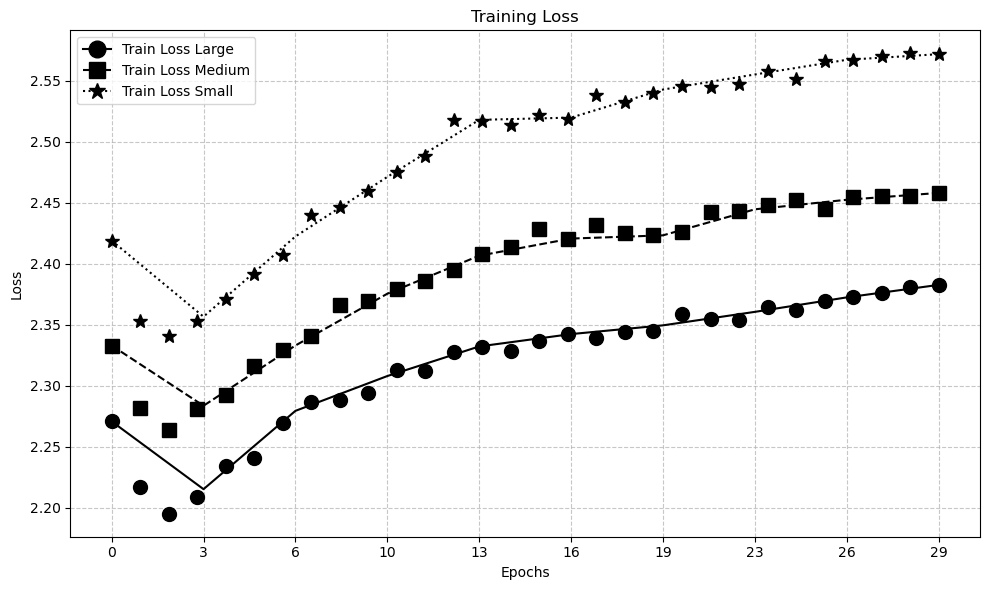

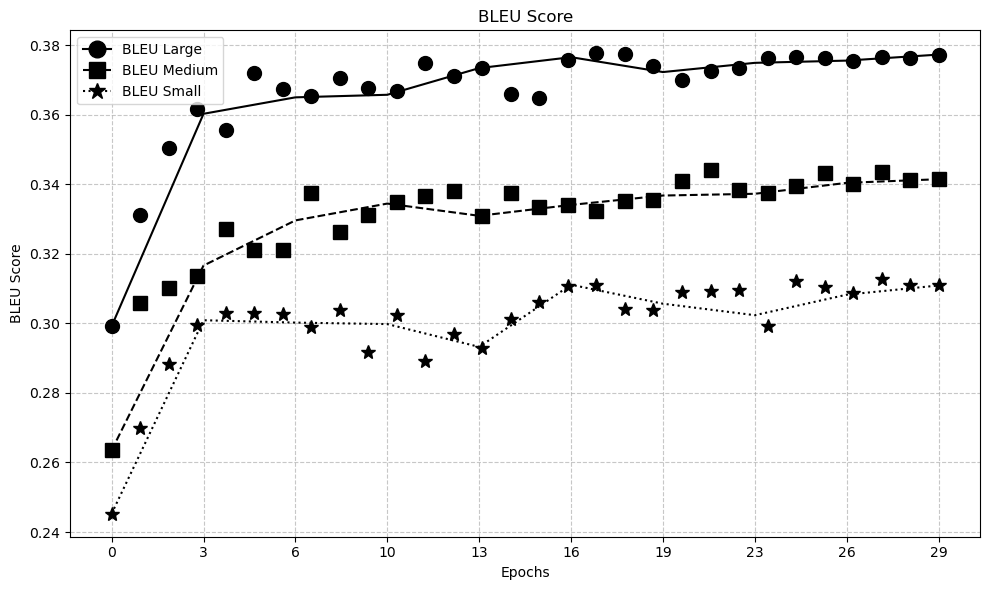

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
import matplotlib.lines as mlines

# File paths (update as necessary)
small_csv_file = "/home/user1-system11/Documents/research-shradha/CODE-SPT-Code-TreeSitterV3/SPT-Code/outputs/pre_train_20241114_173013/small_evaluation_metrics.csv"
mid_csv_file = "/home/user1-system11/Documents/research-shradha/CODE-SPT-Code-TreeSitterV3/SPT-Code/outputs/pre_train_20241116_103947/mid_evaluation_metrics.csv"
large_csv_file = "/home/user1-system11/Documents/research-shradha/CODE-SPT-Code-TreeSitterV3/SPT-Code/outputs/pre_train_20241105_105459/large_evaluation_metrics.csv"

# Load data from CSV files with error handling
try:
    small_data = pd.read_csv(small_csv_file)
    mid_data = pd.read_csv(mid_csv_file)
    large_data = pd.read_csv(large_csv_file)
except FileNotFoundError as e:
    print(f"Error loading file: {e}")
    exit(1)

# Extract columns with error handling
def extract_column(data, column_name):
    try:
        return data[column_name].tolist()
    except KeyError:
        print(f"Column '{column_name}' not found in data")
        return []

epochs = extract_column(small_data, "epoch")
train_loss_large = extract_column(large_data, "eval_loss")
train_loss_medium = extract_column(mid_data, "eval_loss")
train_loss_small = extract_column(small_data, "eval_loss")

bleu_large = extract_column(large_data, "eval_bleu")
bleu_medium = extract_column(mid_data, "eval_bleu")
bleu_small = extract_column(small_data, "eval_bleu")

# Smoothing function with fixed number of points for X-axis
def smooth_data_fixed_points(epochs, data, num_points=10):
    if len(epochs) < 3 or len(data) < 3:
        print("Not enough data for smoothing.")
        return np.array(epochs), np.array(data)
    epochs_new = np.linspace(min(epochs), max(epochs), num_points)  # Fix to num_points
    data_smooth = make_interp_spline(epochs, data)(epochs_new)
    return epochs_new, data_smooth

# Generic plotting function with evenly spaced random X-axis ticks
def plot_metric_even_random_x(
    title, xlabel, ylabel, legend_labels, epochs, data_list, colors, markers, linestyles, save_path=None, grid=True
):
    plt.figure(figsize=(10, 6))
    for data, color, label, marker, linestyle in zip(data_list, colors, legend_labels, markers, linestyles):
        if not data:
            print(f"Skipping empty data for label: {label}")
            continue
        epochs_new, data_smooth = smooth_data_fixed_points(epochs, data, num_points=10)  # Use 10 points for X-axis
        plt.plot(epochs_new, data_smooth, label=label, color=color, linestyle=linestyle)
        plt.plot(epochs, data, marker=marker, linestyle='None', color=color, markersize=10)

    # Custom legend
    custom_legend = [
        mlines.Line2D([], [], color=color, marker=marker, linestyle=linestyle, label=label, markersize=12)
        for color, marker, linestyle, label in zip(colors, markers, linestyles, legend_labels)
    ]
    plt.legend(handles=custom_legend)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Select 10 evenly spaced random X-axis ticks
    ticks = np.linspace(min(epochs), max(epochs), 10)  # Generate 10 evenly spaced ticks
    tick_labels = [int(round(tick)) for tick in ticks]  # Convert to integers
    plt.xticks(ticks, tick_labels)  # Apply ticks and labels

    if grid:
        plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0.1)
        print(f"Plot saved to {save_path}")

# Loss Plot with evenly spaced X-axis ticks
plot_metric_even_random_x(
    title="Training Loss",
    xlabel="Epochs",
    ylabel="Loss",
    legend_labels=["Train Loss Large", "Train Loss Medium", "Train Loss Small"],
    epochs=epochs,
    data_list=[train_loss_large, train_loss_medium, train_loss_small],
    colors=["black", "black", "black"],
    markers=["o", "s", "*"],
    linestyles=["-", "--", ":"],
    save_path="/home/user1-system11/Documents/research-shradha/CODE-SPT-Code/Graph/case10-org-loss-even.png"
)

# BLEU Score Plot with evenly spaced X-axis ticks
plot_metric_even_random_x(
    title="BLEU Score",
    xlabel="Epochs",
    ylabel="BLEU Score",
    legend_labels=["BLEU Large", "BLEU Medium", "BLEU Small"],
    epochs=epochs,
    data_list=[bleu_large, bleu_medium, bleu_small],
    colors=["black", "black", "black"],
    markers=["o", "s", "*"],
    linestyles=["-", "--", ":"],
    save_path="/home/user1-system11/Documents/research-shradha/CODE-SPT-Code/Graph/case12-org-bleu-even.png"
)


CAP JDT 

Plot saved to /home/user1-system11/Documents/research-shradha/CODE-SPT-Code/Graph/case10-org-loss-fixed.png
Plot saved to /home/user1-system11/Documents/research-shradha/CODE-SPT-Code/Graph/case12-org-bleu-fixed.png


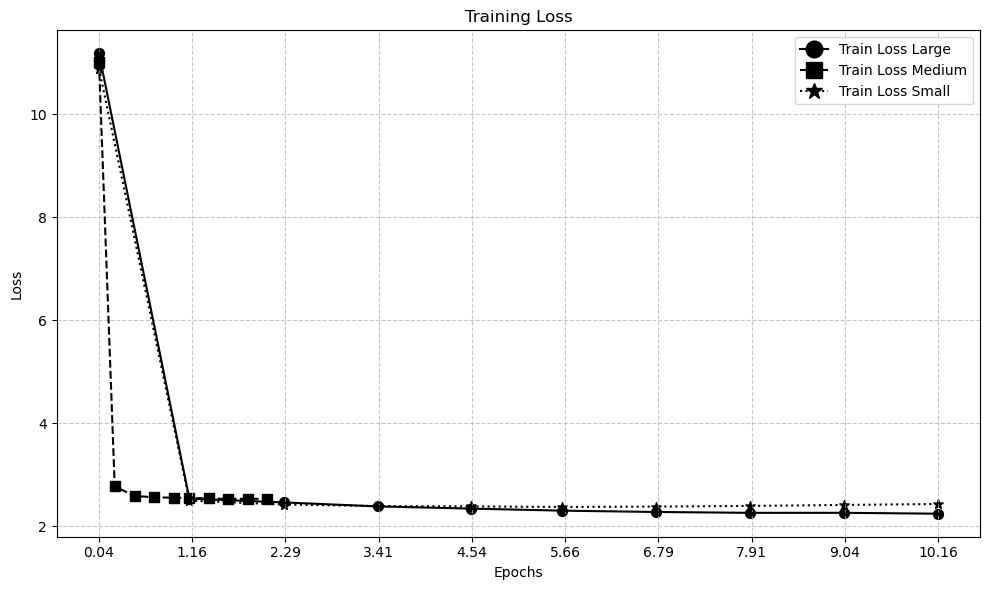

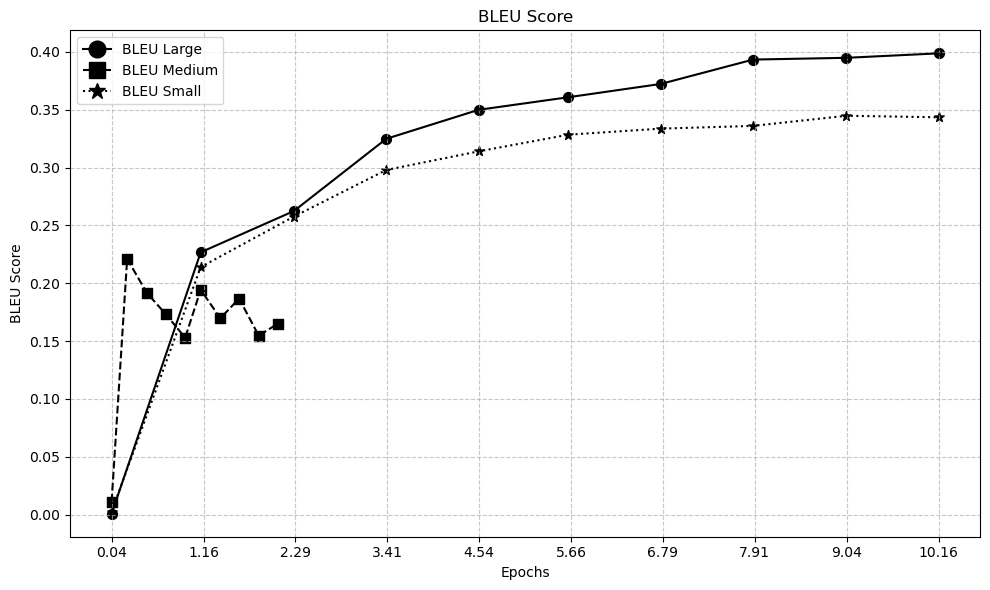

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
import matplotlib.lines as mlines


small_csv_file = "/home/user1-system11/Documents/research-shradha/CODE-SPT-Code/Graph/small_eval_metrics.csv"
mid_csv_file = "/home/user1-system11/Documents/research-shradha/CODE-SPT-Code/Graph/mid_eval_metrics.csv"
large_csv_file = "/home/user1-system11/Documents/research-shradha/CODE-SPT-Code/Graph/large_eval_metrics.csv"

try:
    small_data = pd.read_csv(small_csv_file)
    mid_data = pd.read_csv(mid_csv_file)
    large_data = pd.read_csv(large_csv_file)
except FileNotFoundError as e:
    print(f"Error loading file: {e}")
    exit(1)

def extract_column(data, column_name):
    try:
        return data[column_name].tolist()
    except KeyError:
        print(f"Column '{column_name}' not found in data")
        return []

epochs = extract_column(small_data, "epoch")
train_loss_large = extract_column(large_data, "eval_loss")
train_loss_medium = extract_column(mid_data, "eval_loss")
train_loss_small = extract_column(small_data, "eval_loss")

bleu_large = extract_column(large_data, "eval_bleu")
bleu_medium = extract_column(mid_data, "eval_bleu")
bleu_small = extract_column(small_data, "eval_bleu")

def reduce_to_fixed_points(epochs, data, num_points=10):
    if len(epochs) != len(data):
        min_length = min(len(epochs), len(data))
        epochs = epochs[:min_length]
        data = data[:min_length]
    
    indices = np.linspace(0, len(epochs) - 1, num_points, dtype=int)
    reduced_epochs = [epochs[i] for i in indices]
    reduced_data = [data[i] for i in indices]
    return reduced_epochs, reduced_data


def plot_metric_fixed_x(
    title, xlabel, ylabel, legend_labels, epochs, data_list, colors, markers, linestyles, save_path=None, grid=True
):
    plt.figure(figsize=(10, 6))
    for data, color, label, marker, linestyle in zip(data_list, colors, legend_labels, markers, linestyles):
        if not data:
            print(f"Skipping empty data for label: {label}")
            continue

        reduced_epochs, reduced_data = reduce_to_fixed_points(epochs, data, num_points=10)

        plt.plot(reduced_epochs, reduced_data, label=label, color=color, linestyle=linestyle)
        plt.scatter(reduced_epochs, reduced_data, marker=marker, color=color, s=50)

    custom_legend = [
        mlines.Line2D([], [], color=color, marker=marker, linestyle=linestyle, label=label, markersize=12)
        for color, marker, linestyle, label in zip(colors, markers, linestyles, legend_labels)
    ]
    plt.legend(handles=custom_legend)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.linspace(min(epochs), max(epochs), 10))  # Set 10 evenly spaced ticks
    if grid:
        plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0.1)
        print(f"Plot saved to {save_path}")


plot_metric_fixed_x(
    title="Training Loss",
    xlabel="Epochs",
    ylabel="Loss",
    legend_labels=["Train Loss Large", "Train Loss Medium", "Train Loss Small"],
    epochs=epochs,
    data_list=[train_loss_large, train_loss_medium, train_loss_small],
    colors=["black", "black", "black"],
    markers=["o", "s", "*"],
    linestyles=["-", "--", ":"],
    save_path="/home/user1-system11/Documents/research-shradha/CODE-SPT-Code/Graph/case10-org-loss-fixed.png"
)

# BLEU Score Plot with fixed X-axis points
plot_metric_fixed_x(
    title="BLEU Score",
    xlabel="Epochs",
    ylabel="BLEU Score",
    legend_labels=["BLEU Large", "BLEU Medium", "BLEU Small"],
    epochs=epochs,
    data_list=[bleu_large, bleu_medium, bleu_small],
    colors=["black", "black", "black"],
    markers=["o", "s", "*"],
    linestyles=["-", "--", ":"],
    save_path="/home/user1-system11/Documents/research-shradha/CODE-SPT-Code/Graph/case12-org-bleu-fixed.png"
)
